## Bank Churn Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries


In [2]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline


In [4]:
churn_data = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df = pd.DataFrame(churn_data)

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
columns_to_keep = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
df = df[columns_to_keep]


In [8]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


<ipython-input-8-7db4ca0e482c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df_encoded = pd.get_dummies(df, columns=['Geography'], prefix=['Geo'])


In [12]:
df_encoded

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


### Plotting

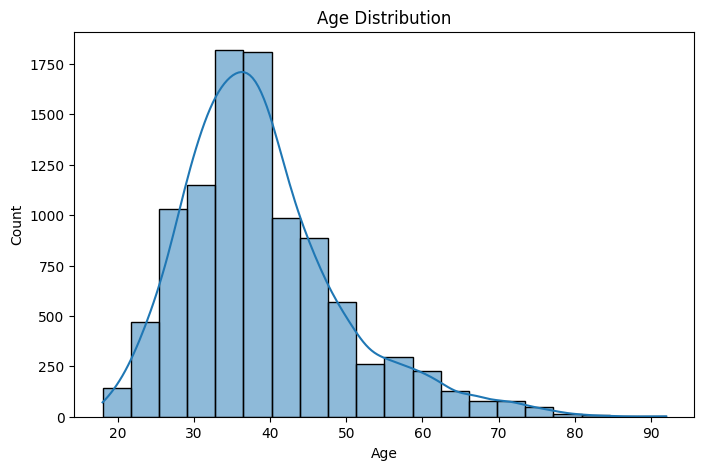

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


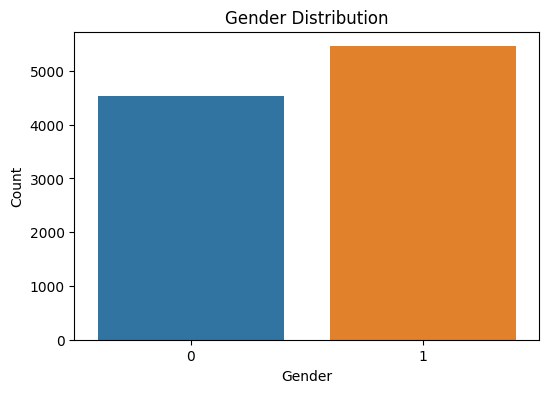

In [14]:
# Plot a countplot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


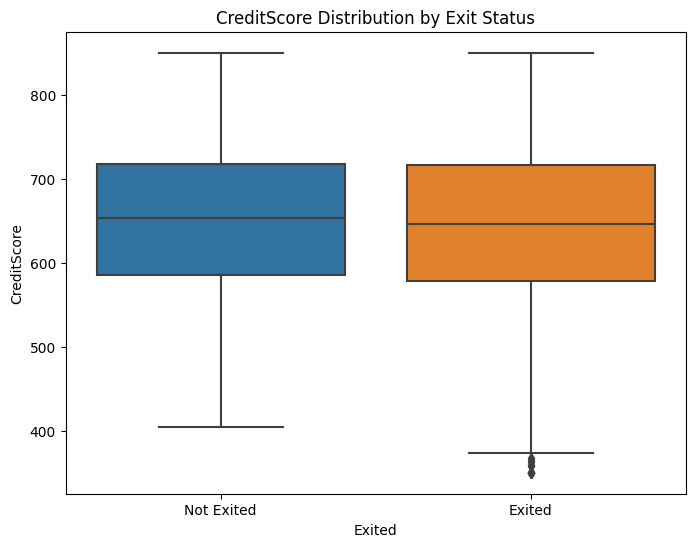

In [15]:
# Plot a boxplot for CreditScore by Exit
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Exited', y='CreditScore')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.title('CreditScore Distribution by Exit Status')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()


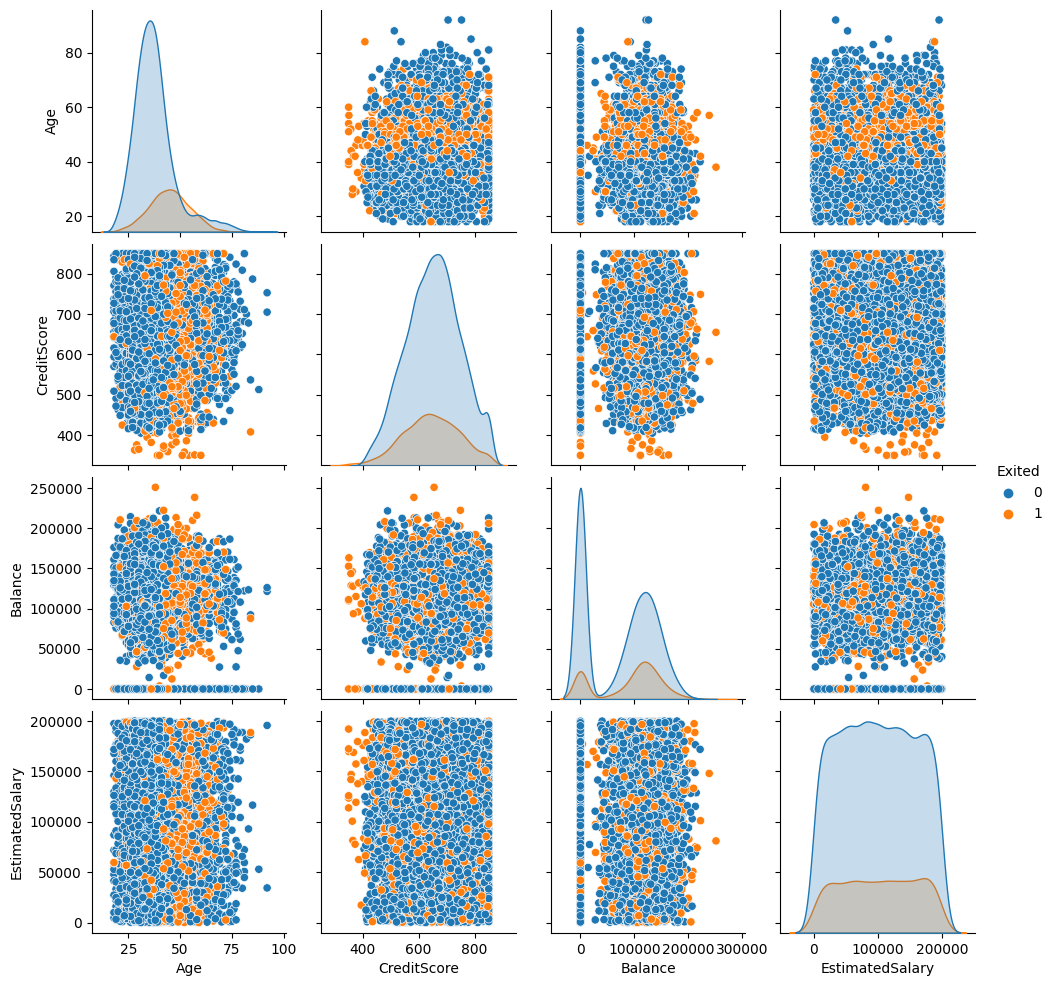

In [16]:
# Create a pairplot to explore relationships between numeric features
sns.pairplot(df[['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()


<ipython-input-17-0a2f4ea57557>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


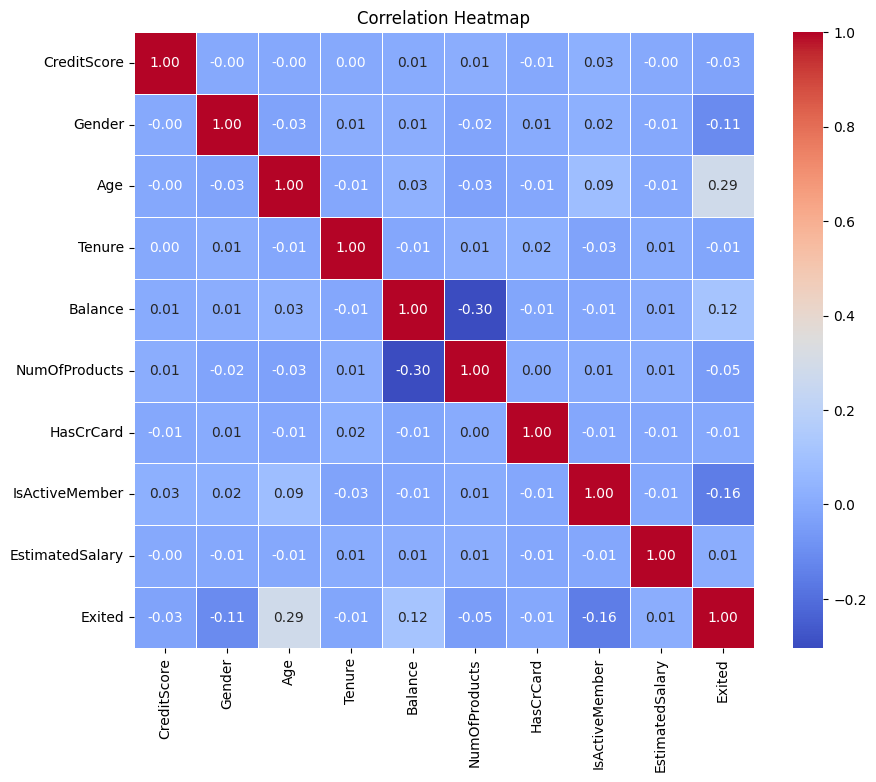

In [17]:
# Create a correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


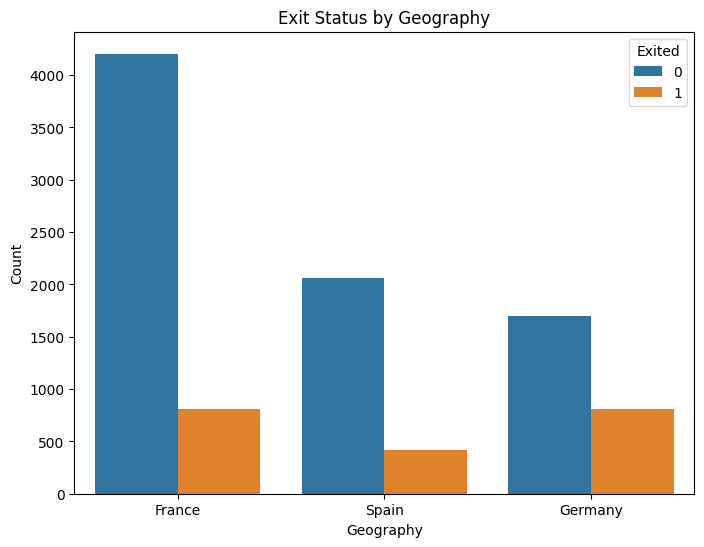

In [18]:
# Plot a countplot for Exit status by Geography
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Exit Status by Geography')
plt.show()


<ipython-input-19-f7125d5cd47e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  exit_ratio_pivot = exit_ratio.pivot('Age', 'Tenure', 'Exited')


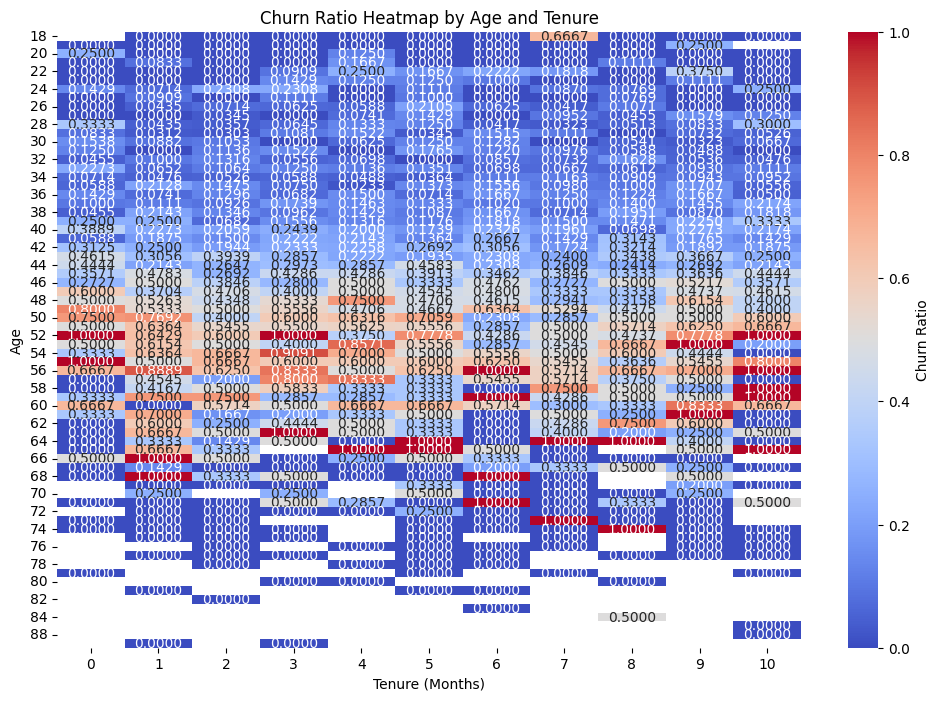

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with Age, Tenure, and Exit columns
age_tenure_exit_df = df[['Age', 'Tenure', 'Exited']]

# Group the data by Age and Tenure and calculate the churn ratio
exit_ratio = age_tenure_exit_df.groupby(['Age', 'Tenure'])['Exited'].mean().reset_index()

# Pivot the data for plotting as a heatmap
exit_ratio_pivot = exit_ratio.pivot('Age', 'Tenure', 'Exited')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(exit_ratio_pivot, cmap='coolwarm', annot=True, fmt=".4f", cbar_kws={'label': 'Churn Ratio'})
plt.xlabel('Tenure (Months)')
plt.ylabel('Age')
plt.title('Churn Ratio Heatmap by Age and Tenure')
plt.show()


# Modeling

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier  # Import KNN

# Define your feature columns (X) and target variable (y)
y = df_encoded['Exited']              # Target variable ('Exited')

X = df_encoded.drop('Exited', axis=1)  # Features (all columns except 'Exited')

# Split the data into training and testing (20% testing )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standard Scaller

In [21]:
# standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

###  Logistic Regression


In [22]:

logistic_model = LogisticRegression(random_state=22)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.811


###  Random Forest Classifier


In [23]:

rf_model = RandomForestClassifier(random_state=22)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Accuracy: 0.8665


###  K-Nearest Neighbors (KNN)


In [25]:

knn_model = KNeighborsClassifier(n_neighbors=30)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)  # Predictions for KNN
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, knn_predictions))


K-Nearest Neighbors (KNN) Accuracy: 0.836


###  Support Vector Machine (SVM)


In [24]:
svm_model = SVC(random_state=22)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))


Support Vector Machine Accuracy: 0.856
